# Natural Language Processing Project

In this NLP project, you will be attempting to classify Yelp Reviews into 1-star or 5-star categories based on the text content in the reviews. Also, there will be another category Bad Neutral Good using different models in each way.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

## The Data


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('yelp.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
#Create a new column called "text length" which is the number of words in the text column.
data['text lenght']=data['text'].apply(len)
data['text lenght']

0        889
1       1345
2         76
3        419
4        469
        ... 
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text lenght, Length: 10000, dtype: int64

# EDA

Let's explore the data

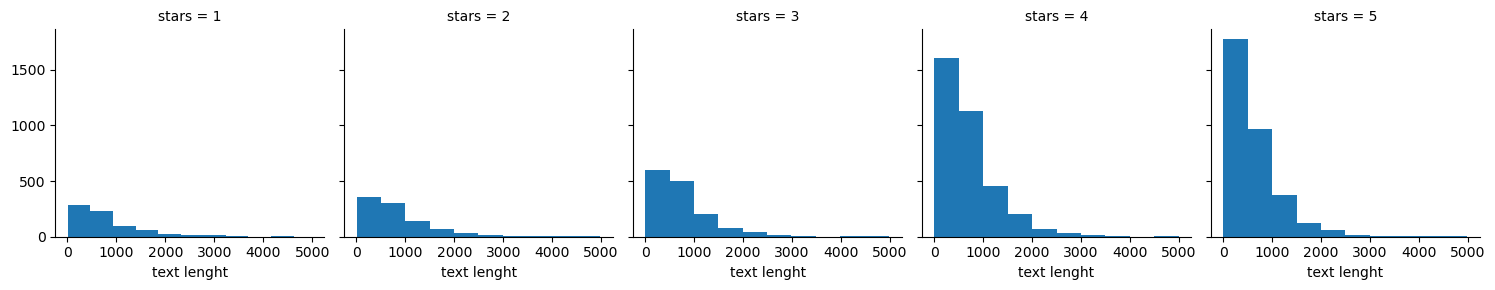

In [7]:
facedgrit=sns.FacetGrid(data,col='stars')
facedgrit.map(plt.hist,'text lenght')

<AxesSubplot: xlabel='stars', ylabel='text lenght'>

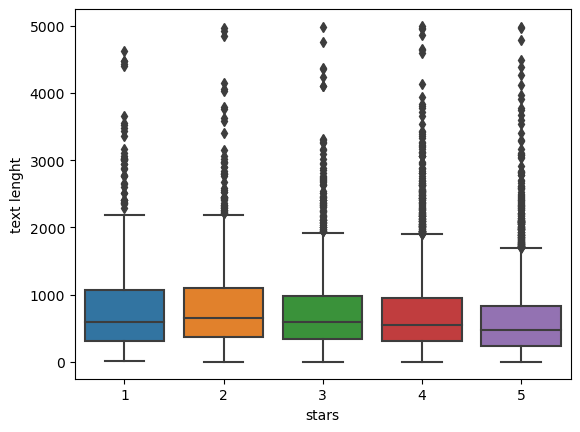

In [8]:
sns.boxplot(data,x='stars',y='text lenght')

<AxesSubplot: xlabel='stars', ylabel='count'>

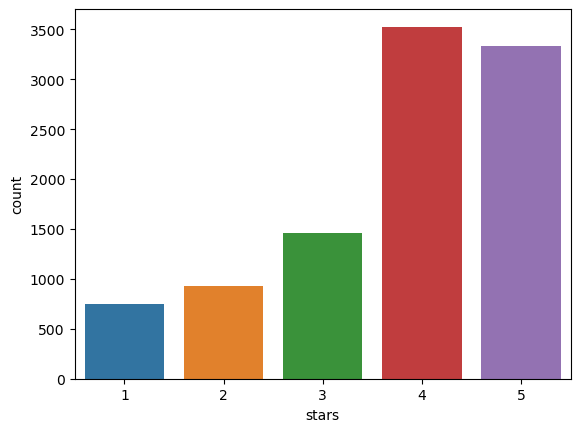

In [9]:
sns.countplot(data,x='stars')

In [10]:
data.groupby(['stars']).mean()

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot: >

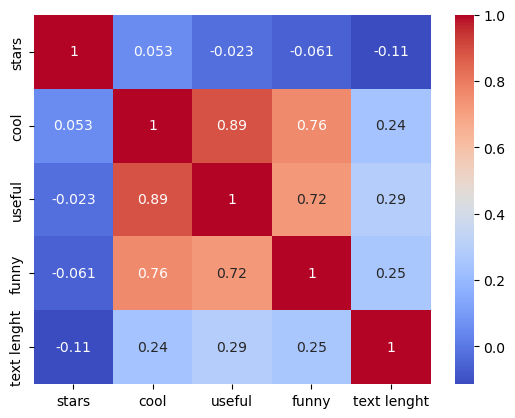

In [11]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

we only grab reviews that were either 1 star or 5 stars.

In [12]:
yelp_class=pd.concat([data[data['stars']==5],data[data['stars']==1]])
X=yelp_class['text']
y=yelp_class['stars']

def text_process(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

X=CountVectorizer(analyzer=text_process).fit_transform(X)
#usingTF-IDF made the model performance worse!

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nb = MultinomialNB()
nb.fit(X_train,y_train)
predict=nb.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[100  45]
 [ 22 651]]
              precision    recall  f1-score   support

           1       0.82      0.69      0.75       145
           5       0.94      0.97      0.95       673

    accuracy                           0.92       818
   macro avg       0.88      0.83      0.85       818
weighted avg       0.91      0.92      0.92       818



## NLP Classification

now we seperate starts in to 3 different categories.

In [17]:
Cust=[]
for i in data['stars']:
    if (i==1):
        Cust.append('BAD')
    elif (i==2) | (i==3):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
data['Customer Experience']=Cust
X=data['text']
y=data['Customer Experience']

## Using the Pipeline

In [18]:

pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                   ('TF-IDF',TfidfTransformer()),
                   ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline.fit(X_train,y_train)
Pprediction=pipeline.predict(X_test)

print(confusion_matrix(y_test,Pprediction))
print(classification_report(y_test,Pprediction))

[[  28   61   63]
 [   0 1333   36]
 [   4  262  213]]
              precision    recall  f1-score   support

         BAD       0.88      0.18      0.30       152
        GOOD       0.80      0.97      0.88      1369
     NEUTRAL       0.68      0.44      0.54       479

    accuracy                           0.79      2000
   macro avg       0.79      0.53      0.57      2000
weighted avg       0.78      0.79      0.76      2000

